# environment requirements for windows 11

python version: 3.7 (venv recommended) <br>
torchtext==0.8 <br>
torch==1.7 <br>
urllib3==1.26.20 

In [ ]:
from platform import python_version
print(python_version())

In [ ]:
pip install pandas

*usual pip installation method does not work for older version, this line is for cpu package, if you use cuda, use cuda package*

In [ ]:
pip install torch==1.7.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

*torchtext version and pytorch version is strictly matched*

In [ ]:
pip install torchtext==0.8 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
pip list

In [ ]:
pip install ipywidgets

In [ ]:
pip install urllib3==1.26.20

*after installing urllib3 2.0 version, you need to add the following codes in `Lib\site-packages\urllib3\util\url.py`*

```python
from urllib.parse import urlparse
def get_host(url: str) -> (str, str, str):
		parsed_url = urlparse(url)
		return parsed_url.scheme, parsed_url.netloc, parsed_url.path
import urllib3
urllib3.get_host = get_host

```

*before installing py_stringsimjoin, please make sure you have installed Windows 11 SDK and C++ x64/x86 build tools in vscode installer*

In [ ]:
pip install py_stringsimjoin

In [ ]:
pip install vega

In [1]:
from ncNet import ncNet

In [2]:
from vega import VegaLite

*you can ignore the legacy warning*

In [ ]:
ncNet = ncNet(
    trained_model= './save_models/trained_model.pt'
)

CASE STUDY 1: DEPARTMENT STORE DATASET

In [4]:
# The data type must be one of the csv, json, sqlite3, or a DataFrame object.
ncNet.specify_dataset(
    data_type='sqlite3',
    db_url='./dataset/database/department_store/department_store.sqlite',
    table_name='products'
)

[NL Question]: What is the highest price of product, grouped by product type? Show a bar chart, and display by the names in desc.
[Chart Template]: None
[Predicted VIS Query]: mark bar data products encoding x product_type_code y aggregate max product_price transform group x


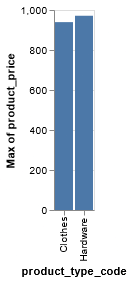

In [5]:
display({'application/vnd.vega.v5+json': ncNet.nl2vis("What is the highest price of product, grouped by product type? Show a bar chart, and display by the names in desc.")[1] }, raw=True)

CASE STUDY 4: CUSTOMERS AND PRODUCTS CONTACTS DATASET

In [6]:
# The data type must be one of the csv, json, sqlite3, or a DataFrame object.
ncNet.specify_dataset(
    data_type='sqlite3',
    db_url='./dataset/database/customers_and_products_contacts/customers_and_products_contacts.sqlite',
    table_name='products'
)

[NL Question]: Show the number of products with price higher than 1000 or lower than 500 for each product name in a bar chart, and could you rank y-axis in descending order?
[Chart Template]: None
[Predicted VIS Query]: mark bar data products encoding x product_name y aggregate count product_name transform filter product_price > 1000 or product_price < 500 group x sort y desc


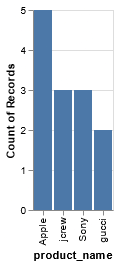

In [7]:
display({'application/vnd.vega.v5+json': ncNet.nl2vis("Show the number of products with price higher than 1000 or lower than 500 for each product name in a bar chart, and could you rank y-axis in descending order?")[1] }, raw=True)